## Fake News Classification with Deep Learning models & ML models

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import sklearn.metrics as metrics

### Steps to build the fake news classifier model

#Reading the train and test data

#Exploratory Data Analysis on the data

#Text preprocessing in order to clean the data and making it more consistent 

#Developing a word embedding layer to convert the words into vectors of lower dimensions

#Model Building using LSTM, Bi-LSTM and other models

#Model Evaulation and Predicting the test output

In [2]:
# Checking the directory and the list of files
import os
for dirname, _, filenames in os.walk('E:/Projects(Freelancer, Kagggle, Hackerearth)/Tom Tom/Fake-News/fake-news/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    break

E:/Projects(Freelancer, Kagggle, Hackerearth)/Tom Tom/Fake-News/fake-news/FakeNews_Classification Using Deep Learning & ML.ipynb
E:/Projects(Freelancer, Kagggle, Hackerearth)/Tom Tom/Fake-News/fake-news/test.csv
E:/Projects(Freelancer, Kagggle, Hackerearth)/Tom Tom/Fake-News/fake-news/train.csv


### Reading the training and test dataset

In [3]:
## Reading the training and test data set
df_train = pd.read_csv('E:/Projects(Freelancer, Kagggle, Hackerearth)/Tom Tom/Fake-News/fake-news/train.csv')
df_test = pd.read_csv('E:/Projects(Freelancer, Kagggle, Hackerearth)/Tom Tom/Fake-News/fake-news/test.csv')

In [4]:
# View the first five rows
df_train.head()
# Labels are 0 and 1 
# 0 : Its not a fake news article (real news)
# 1 : Its a fake news article

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [5]:
#find the information of data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
# # Checking the null values in training data.
print(df_train.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64


In [7]:
## # Checking the null values in test data.
print(df_test.isnull().sum())

id          0
title     122
author    503
text        7
dtype: int64


In [8]:
#filling NULL values with empty string
# Or we can drop those null values
train=df_train.fillna('')
test=df_test.fillna('')

In [9]:
# here we are checking again if there is any NaN value or not
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [10]:
# here we are checking again if there is any NaN value or not
test.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

### Exploratory Data Analysis on the data

In [11]:
train['label'].value_counts()

# This dataset is a balanced one

1    10413
0    10387
Name: label, dtype: int64

In [12]:
unreliable_count =len(train[train['label']==1])
reliable_count = len(train[train['label']== 0])

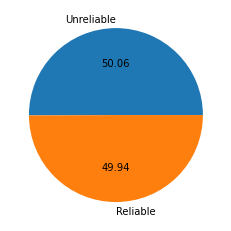

In [13]:
# Pie Chart for output labels with % of data 
y = np.array([unreliable_count,reliable_count])
mylabels = ['Unreliable','Reliable']
plt.pie(y,labels=mylabels,autopct='%.2f')
plt.show()

<AxesSubplot:xlabel='Author'>

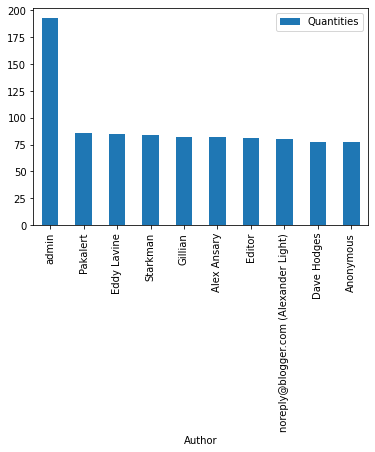

In [14]:
unreliable_author = pd.DataFrame({'Author':df_train[df_train['label']==1]['author'].value_counts().head(10).index,'Quantities':df_train[df_train['label']==1]['author'].value_counts().head(10)})

unreliable_author.plot(kind='bar',x='Author',y='Quantities')

<AxesSubplot:xlabel='Author'>

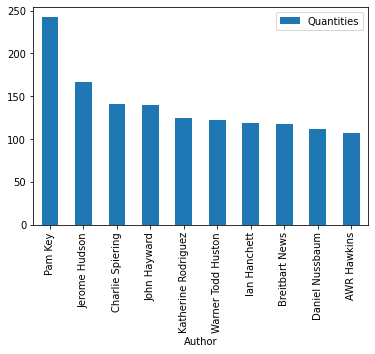

In [15]:
reliable_author = pd.DataFrame({'Author':df_train[df_train['label']==0]['author'].value_counts().head(10).index,'Quantities':df_train[df_train['label']==0]['author'].value_counts().head(10)})

reliable_author.plot(kind='bar',x='Author',y='Quantities')

In [16]:
# # We found the Authors who are generally posting Reliable or Unreliable news

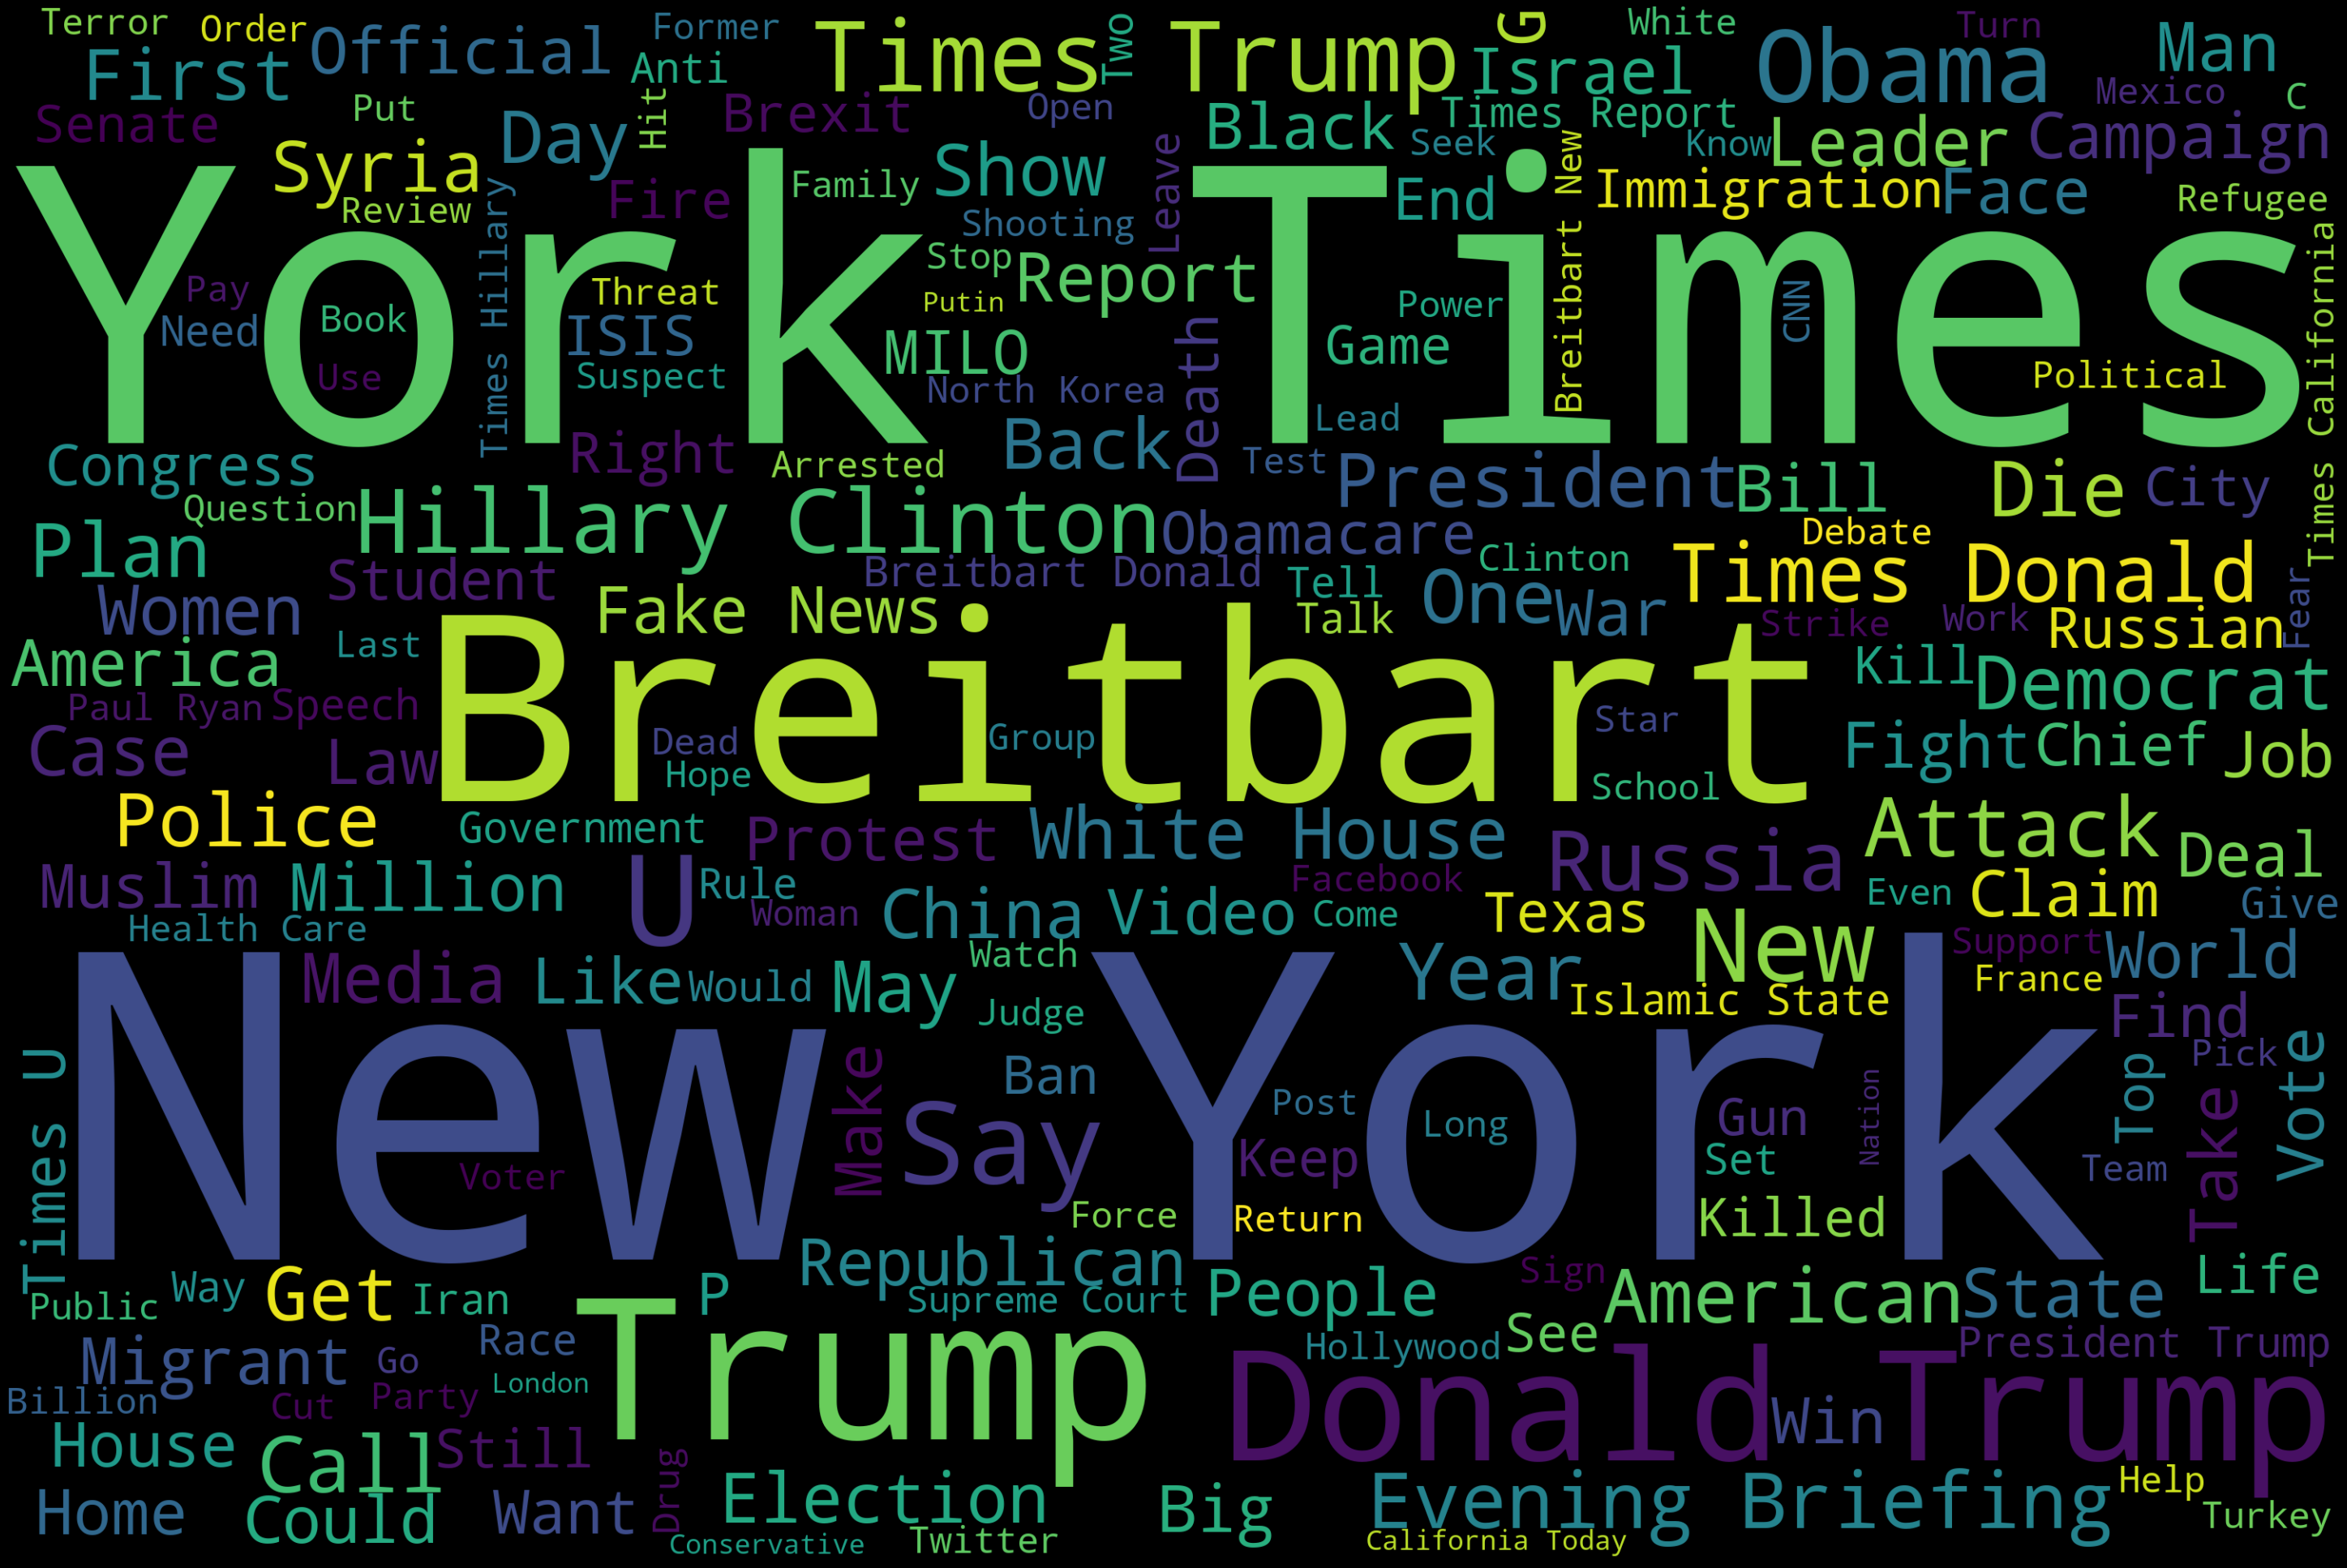

In [17]:
# Preparing the word cloud for the real news article to order to understand type of words in real news
# (column : title of the news)

real = train[train['label']==0]
real.shape

text = ''
for news in real.title.values:
    text += f" {news}"  # f will help to retain the text as a string
wordcloud = WordCloud(width = 3000,height = 2000, background_color = 'black',
                      stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

# In this real news articles there is mention of publisher : (eg : Newyork times) in some articles

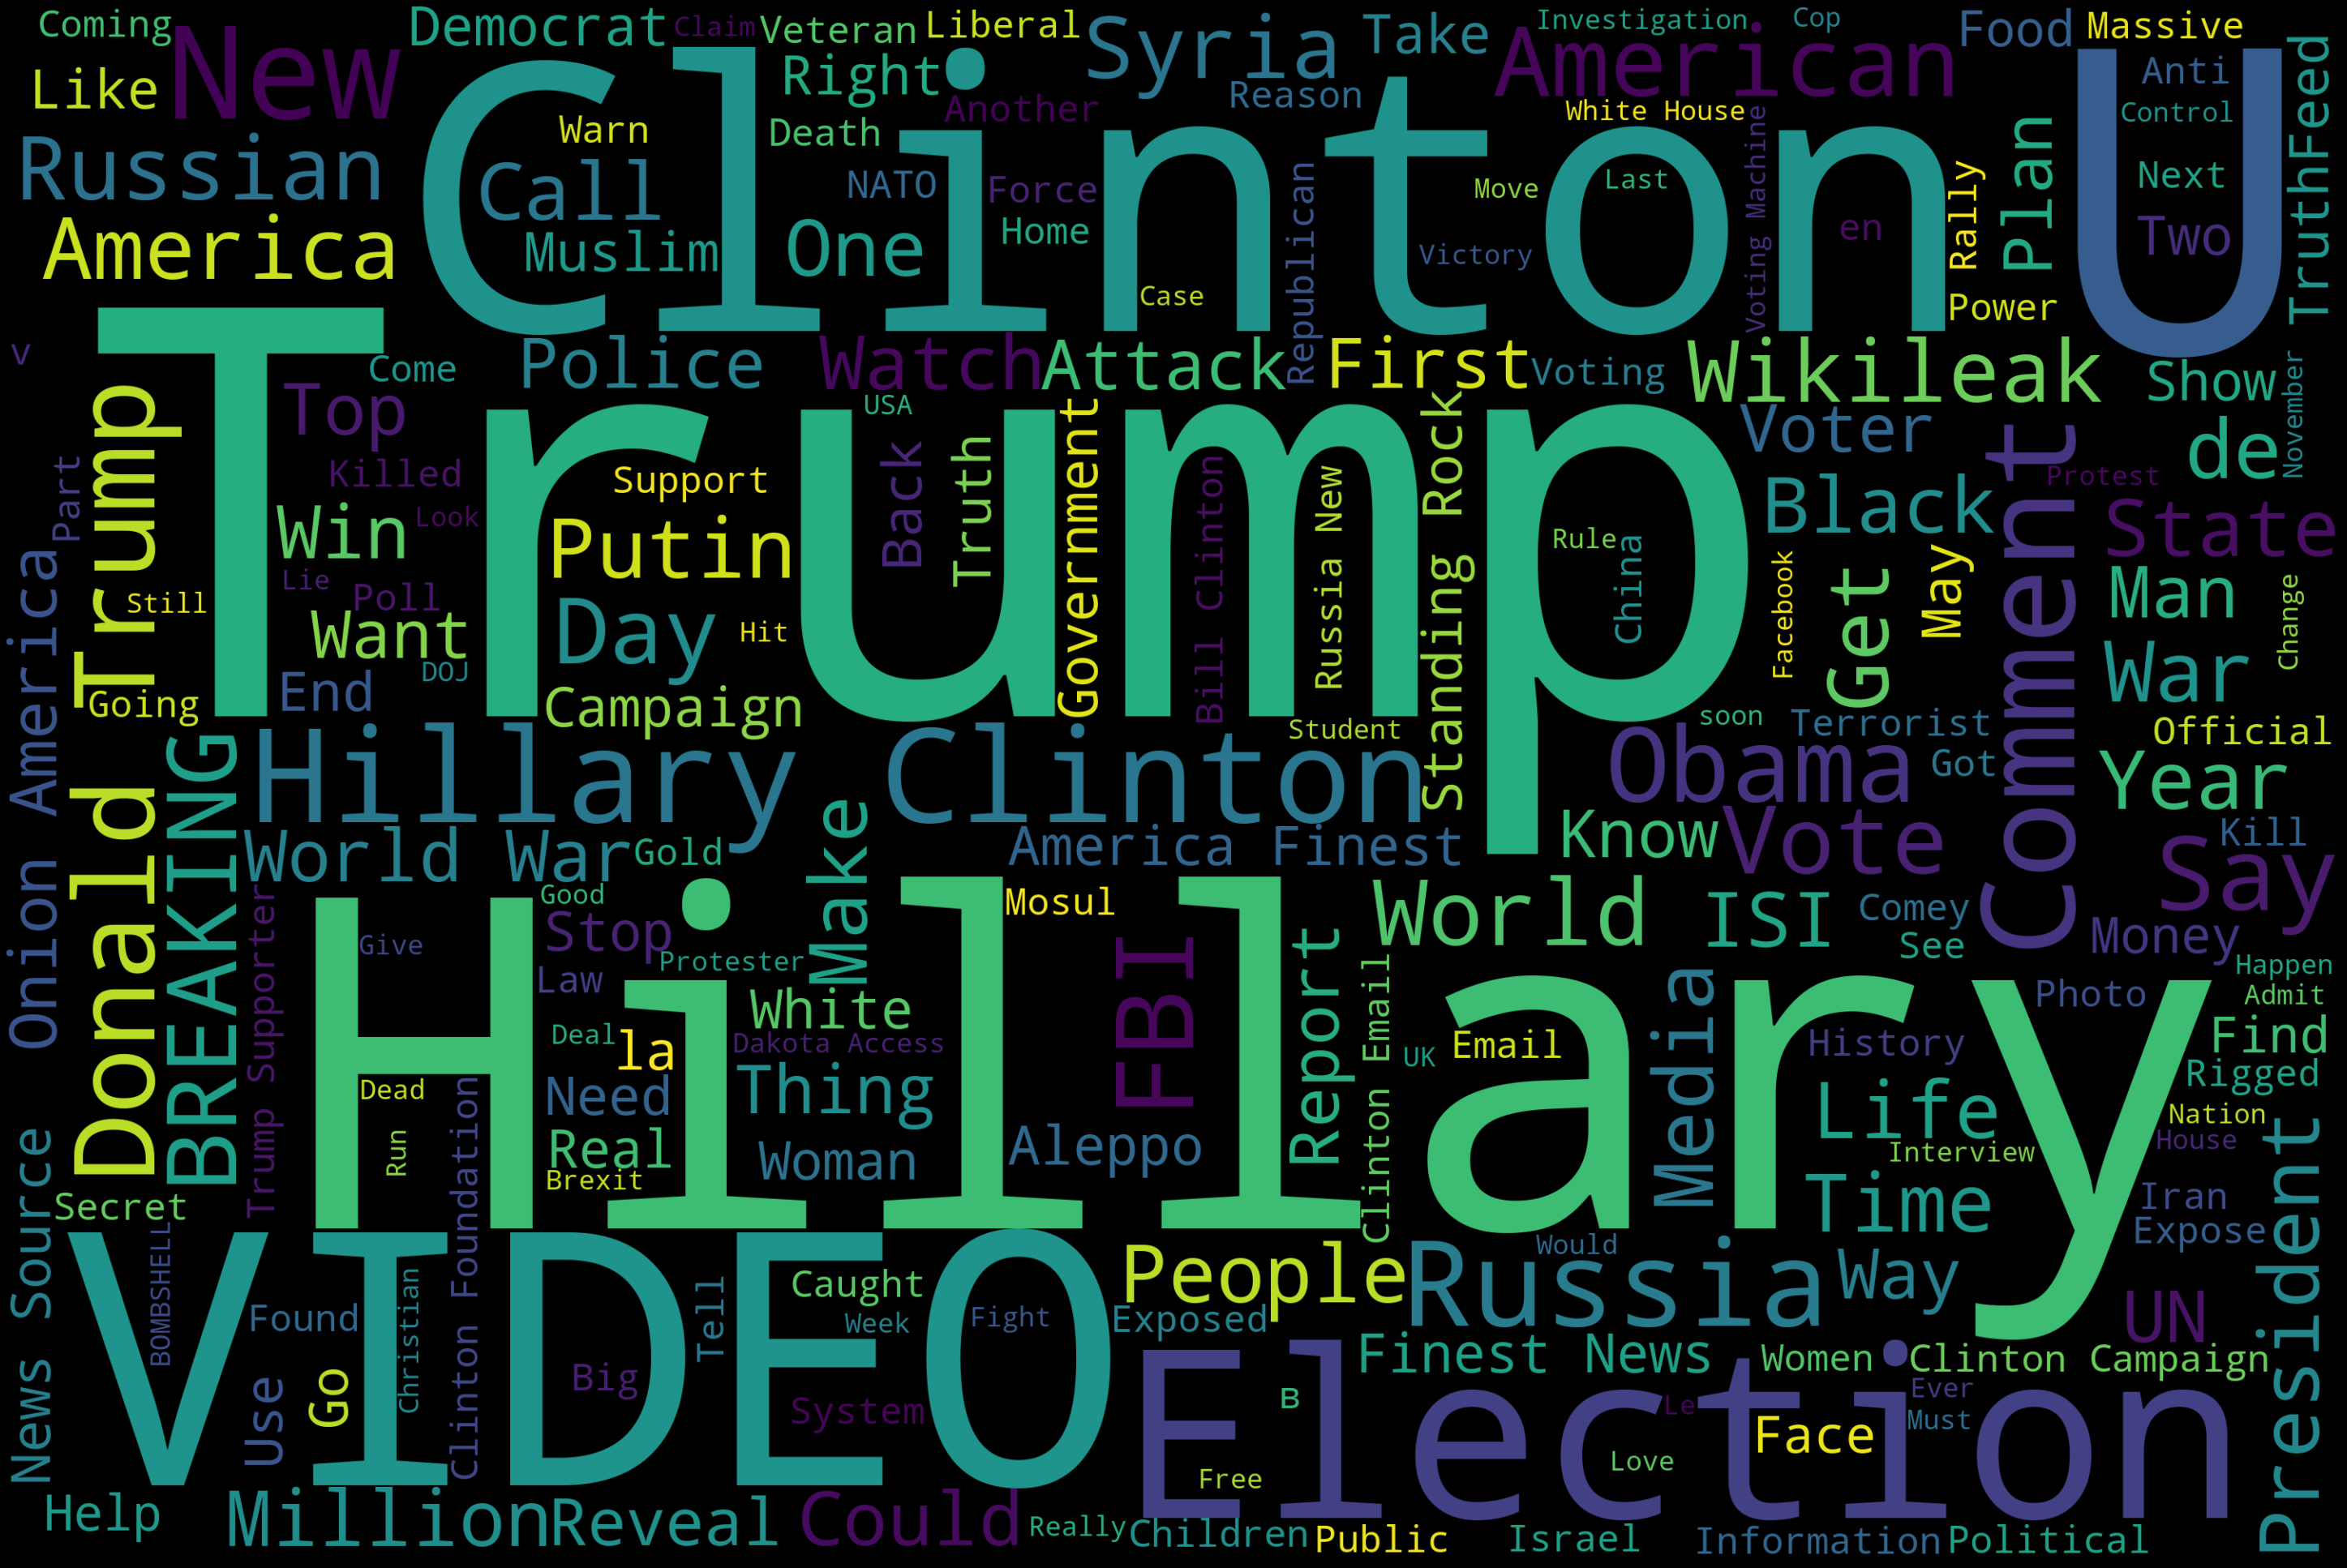

In [18]:
# Preparing the word cloud for fake news article to order to understand type of words in fake news
# (column : title)

fake = train[train['label']==1]
fake.shape

text = ''
for news in fake.title.values:
    text += f" {news}"  # f will help to retain the text as a string
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

# In this articles there is no mention of any publisher in the fake news

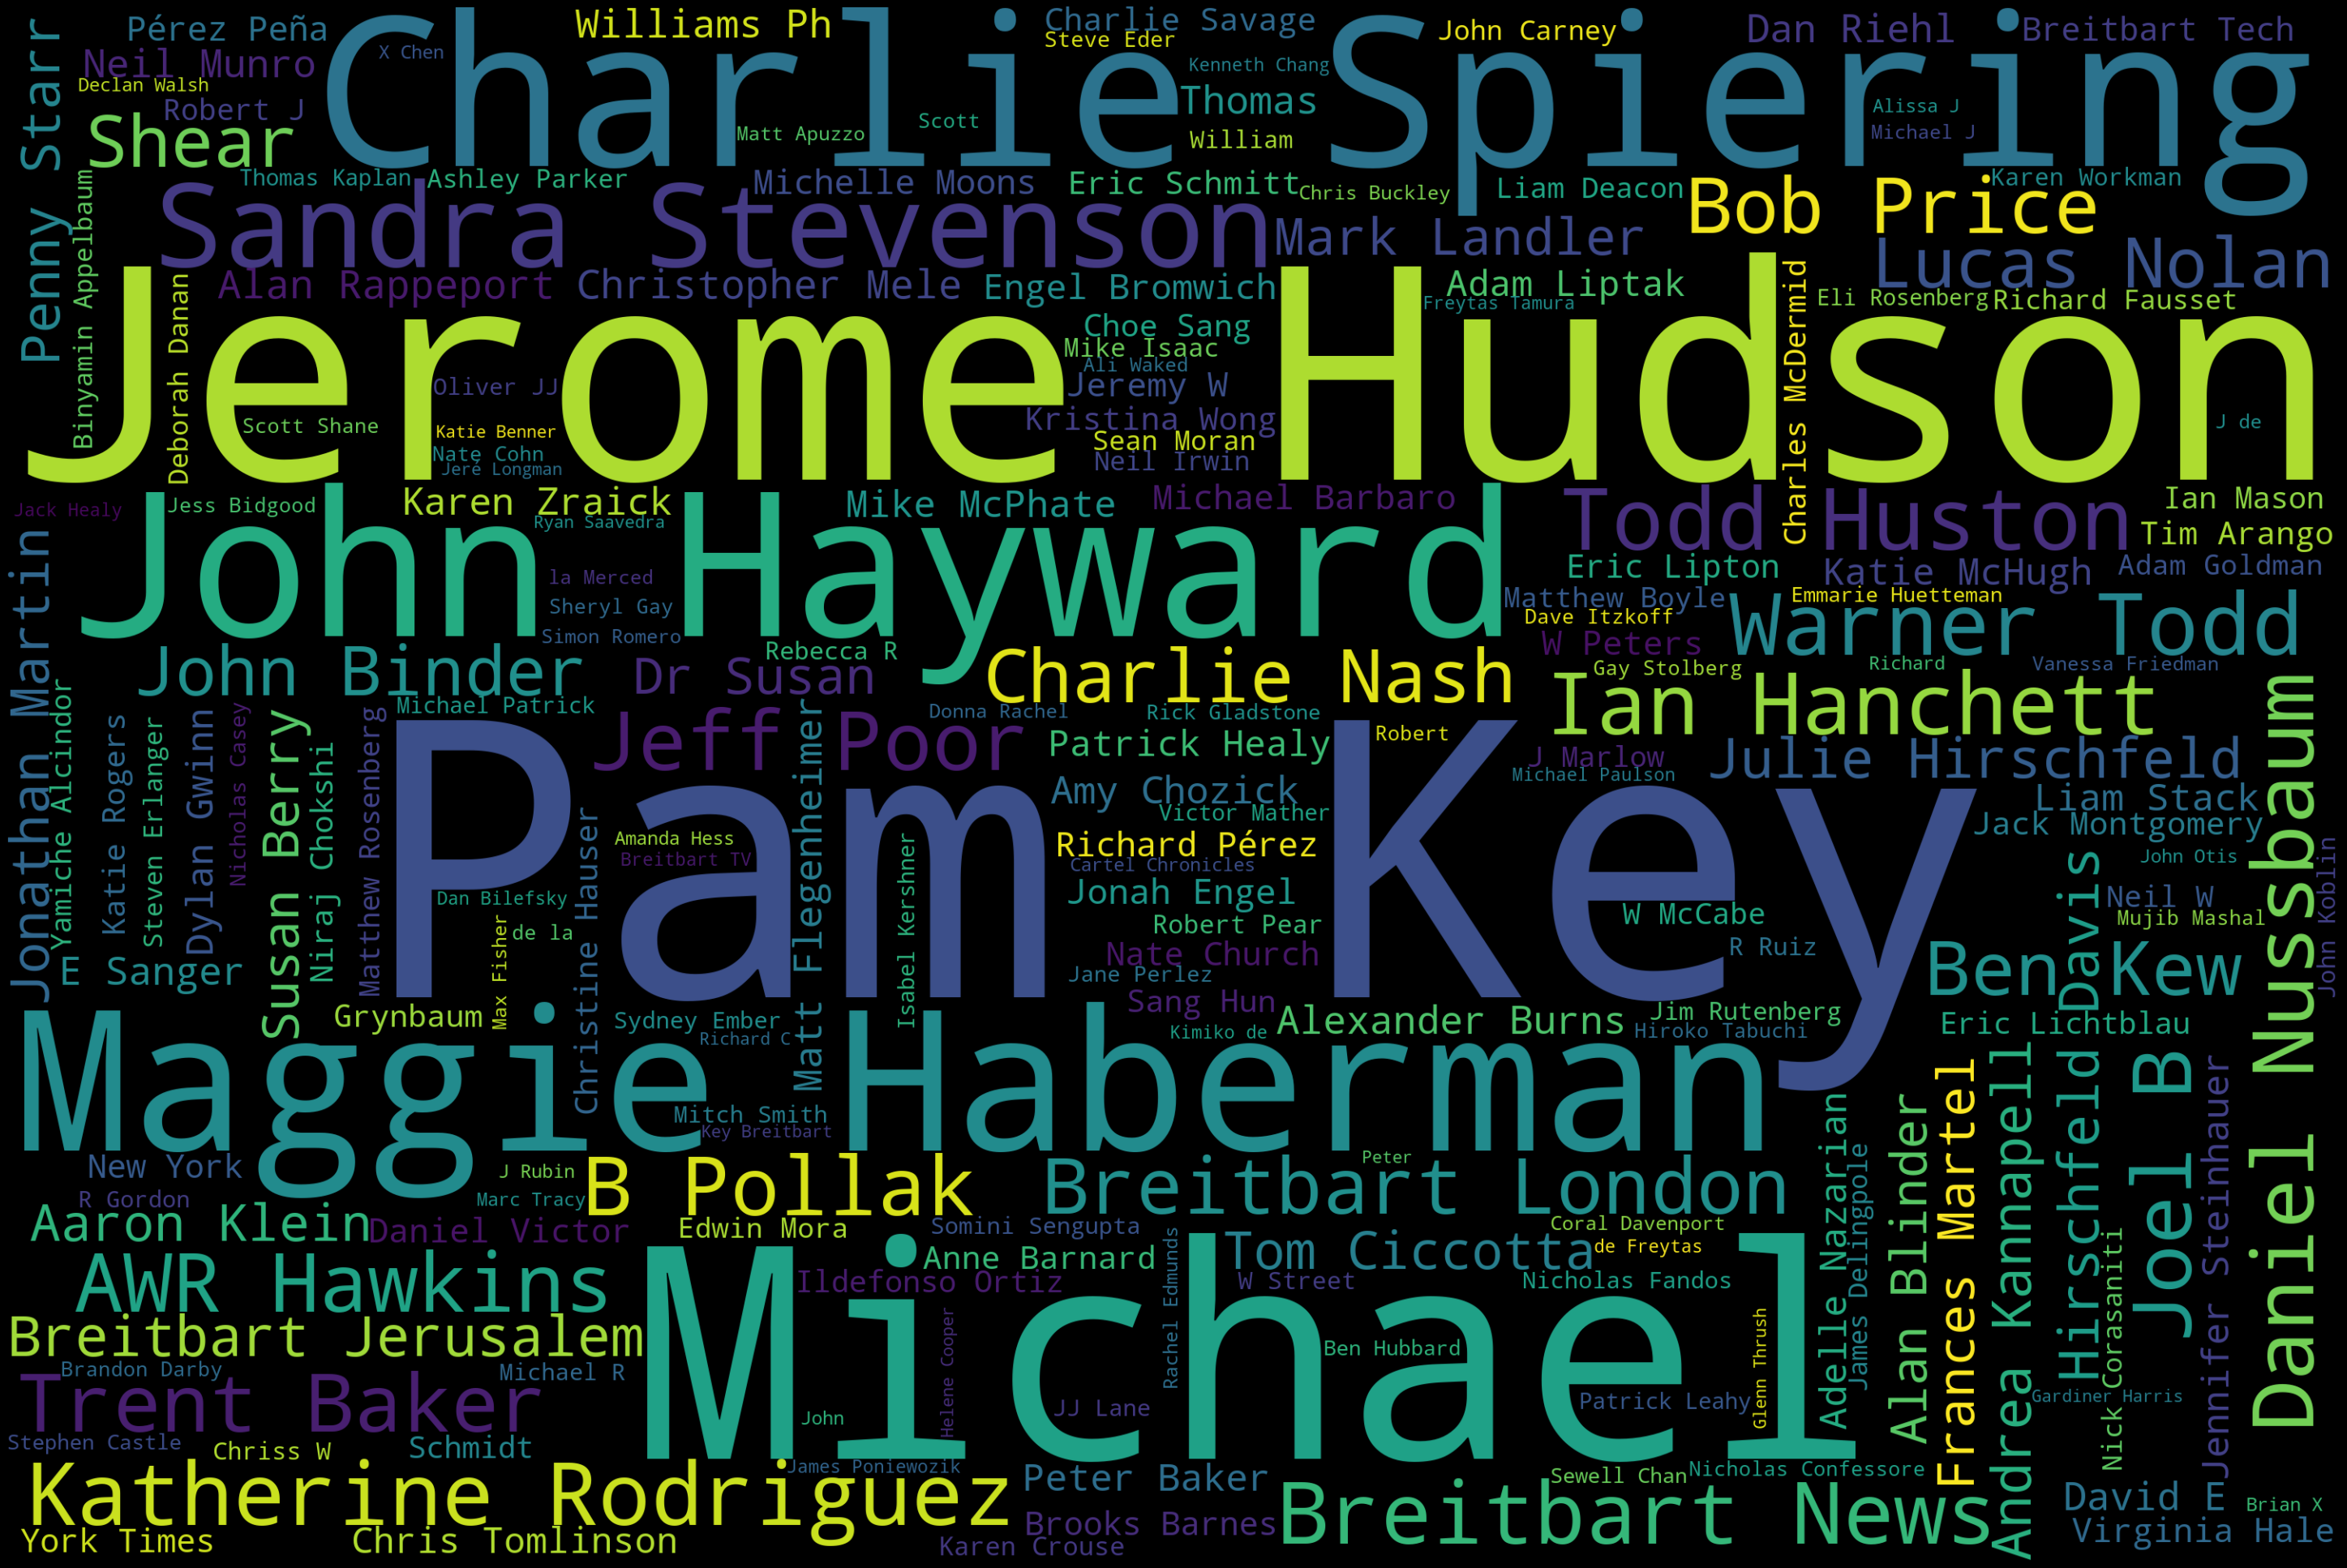

In [19]:
# Preparing the word cloud for real news article to check distribution of words in real author names
# column : Author

real = train[train['label']==0]
real.shape

text = ''
for news in real.author.values:
    text += f" {news}"  # f will help to retain the text as a string
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

# We can see mention of real author names in the real news articles

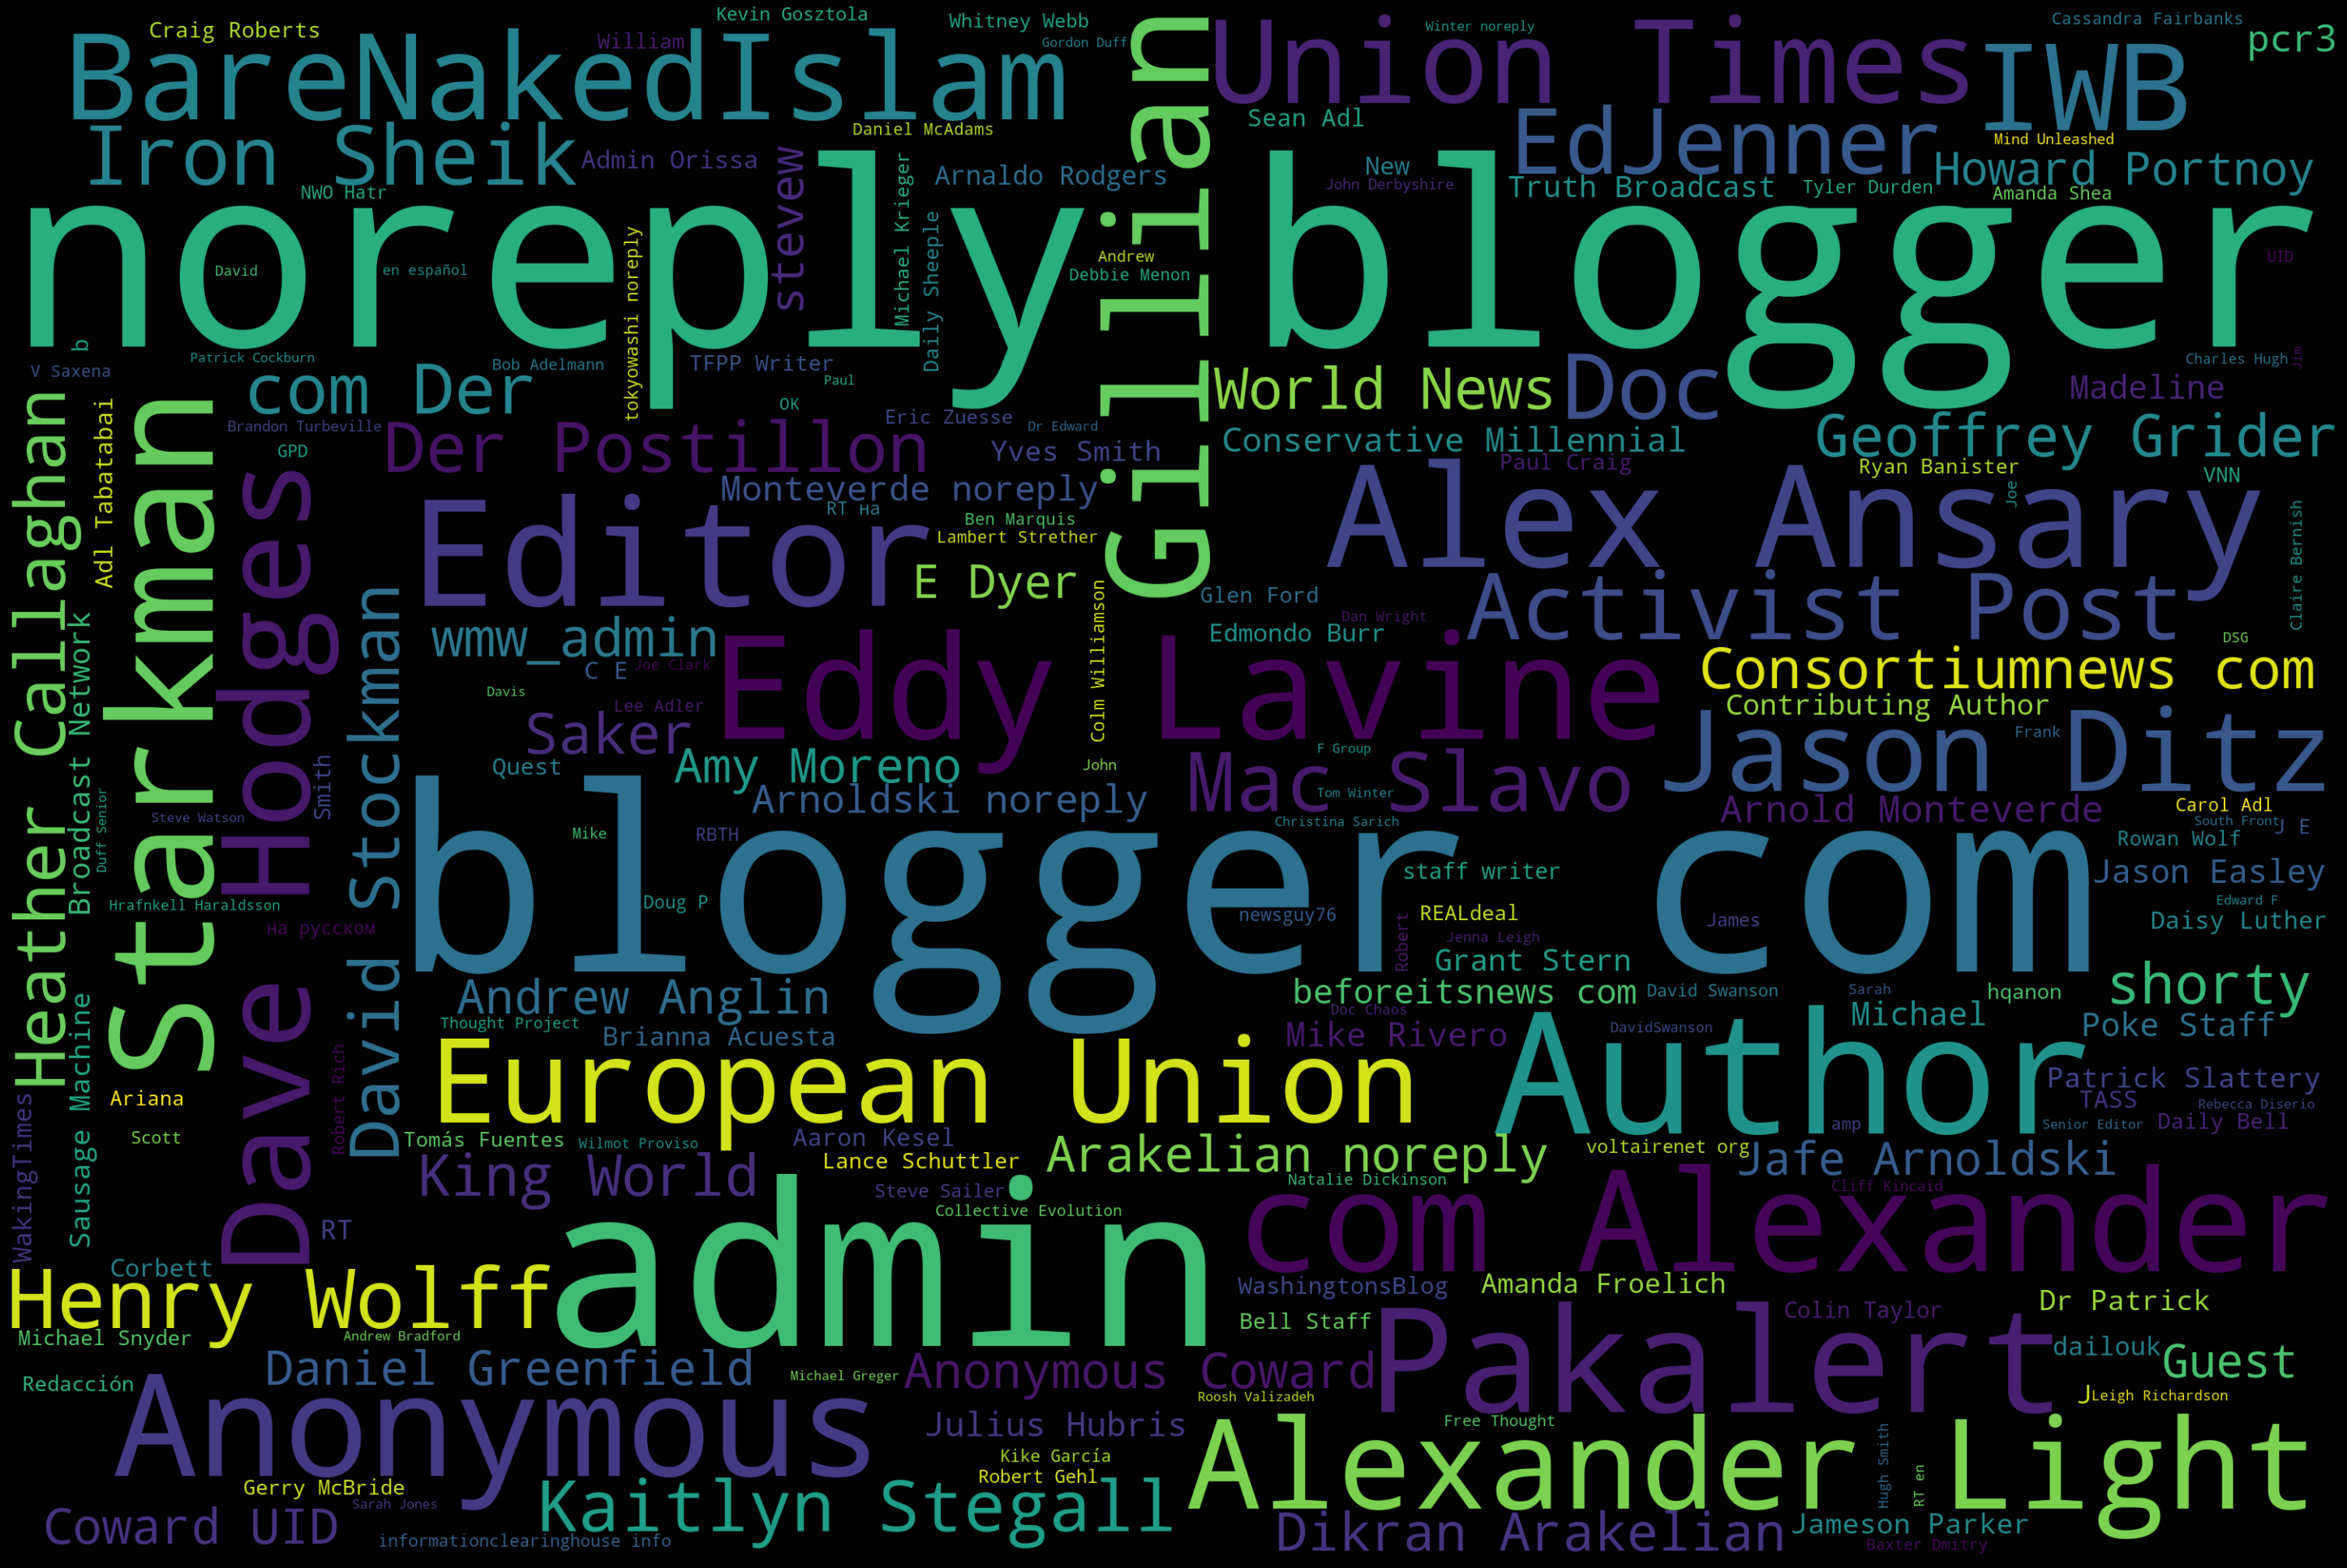

In [20]:
# Preparing the word cloud for fake news article to check distribution of words in fake author names
# column : author

fake = train[train['label']==1]
fake.shape

text = ''
for news in fake.author.values:
    text += f" {news}"  # f will help to retain the text as a string
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

# In this fake news article, the author names are hidden in the form of blogger, editor, anonymous, no reply, activist, post, admin, editor...

In [21]:
# Creating a new independent variable  : concatenating author and title column
# This new independent variable (creating using author and title column) would be perform better in classifying the real and fake news instead of taking an individual variable
# Will use this new independent variable in building the model

train['ti_auth'] = train['title']+' '+ train['author']
test['ti_auth']= test['title']+' '+test['author']

In [22]:
# Dropping the label column from train set #

X = train.drop(['label'],axis=1)
print(X.shape)

Y = train['label']
print(Y.head())

(20800, 5)
0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64


### Text Preprocessing

### Steps as below :

1.Removing special characters and numbers

2.Converting into lowercase to develop a consistent data

3.Tokenize the text, ignoring stopwords and performing stemming on the words

STEMMING:
    
. A stemming algorithm is a process of linguistic normalisation, in which the variant forms of a word are reduced to a common form.

. In simple words, Stemming is the process of reducing a word to its Root word.

Examples:

1.actor, actress, acting --> act

2.eating, eats, eaten --> eat

In [23]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [24]:
X.columns

Index(['id', 'title', 'author', 'text', 'ti_auth'], dtype='object')

In [25]:
# Training data

corpus_train=[]

for i in range(len(X)):
    input = re.sub('[^a-zA-Z]',' ',X['ti_auth'][i]) # except a-z and A-Z, substitute all other characters with ' '
    input = input.lower() # Lower case 
    input  = input.split() # tokenize the text
    input = [ps.stem(word) for word in input if word not in stopwords.words('english')] # ignoring stopwords and stemming rest of the words
    text = ' '.join(input)  # concatenating all words into a single text (list is created)#
    corpus_train.append(text) # appending text into a single corpus #
len(corpus_train)

20800

In [26]:
# Preprocessed text 
corpus_train[0]

'hous dem aid even see comey letter jason chaffetz tweet darrel lucu'

In [27]:
corpus_train[1]

'flynn hillari clinton big woman campu breitbart daniel j flynn'

In [28]:
# Test Data

corpus_test=[]

for i in range(len(test)):
    input = re.sub('[^a-zA-Z]',' ',test['ti_auth'][i]) # except a-z and A-Z, substitute all other characters with ' '
    input = input.lower()
    input  = input.split() # tokenize the text
    input = [ps.stem(word) for word in input if word not in stopwords.words('english')] # ignoring stopwords and stemming rest of the words
    text = ' '.join(input)  # concatenating all words into a single text (list is created)#
    corpus_test.append(text) # appending text into a single corpus #
len(corpus_test)

5200

In [29]:
corpus_test[0]


'specter trump loosen tongu purs string silicon valley new york time david streitfeld'

### Building the word embedding layer with help of keras embedding

In [30]:
# Converting this text into One hot representation #
# Provide an index for each and every word in the text w.r.t the voc_size

voc_size =5000
onehot_rep_train = [one_hot(words,voc_size)for words in corpus_train]
onehot_rep_test = [one_hot(words,voc_size)for words in corpus_test]

In [31]:
onehot_rep_train[0]

[1573, 2862, 32, 2152, 4684, 4915, 2760, 4340, 1309, 4950, 3852, 484]

In [32]:
# Train dataset #
# Find out the maximum length of the sentence in the corpus so that we will pad all sentences to that length

c=[]
for i in range(len(train)):
    m=len(train['ti_auth'][i].split())
    c.append(m)

print('Maximum length of a sentence is : ',max(c))
print('Average length of a sentence is : ',sum(c)/len(c))

# In train dataset, max length is 74

Maximum length of a sentence is :  74
Average length of a sentence is :  14.246057692307692


In [33]:
# Test dataset #
# Find out the maximum length of the sentence in the corpus so that we will pad all sentences to that length

c=[]
for i in range(len(test)):
    m=len(test['ti_auth'][i].split())
    c.append(m)

print('Maximum length of a sentence is : ',max(c))
print('Average length of a sentence is : ',sum(c)/len(c))

# In train dataset, max length is 65

# So we will sentence length is 74 for train and test as it is maxium of the two

Maximum length of a sentence is :  65
Average length of a sentence is :  14.167692307692308


In [34]:
# Pad_sequences in order to make all sentences of equal lenghts of 74

embedded_docs_train = pad_sequences(onehot_rep_train,padding='pre',maxlen=74)
embedded_docs_test = pad_sequences(onehot_rep_test,padding='pre',maxlen=74)

In [35]:
#Converting into numpy array
train_final = np.array(embedded_docs_train)
y_final = np.array(Y)
test_final = np.array(embedded_docs_test)
print(train_final.shape,y_final.shape,test_final.shape)

(20800, 74) (20800,) (5200, 74)


### Dividing the dataset into training,validation and testing data using train_test_split technique

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_final, y_final, test_size=0.1, random_state=42, stratify = y_final)
X_train, x_valid, Y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify = y_train)
test_final = test_final

## Creating Models

### In this phase, several models are created and evaluated against various metrics shown using classification report

## Building the LSTM Model

#### In this model, 

1) The value for embedding feature vectors = 40 which are target feature vectors for the embedding layer.

2) Single LSTM Layer with 100 nodes are used.

3) Dense Layer with 1 neuron and sigmoid activation function is used since, this is a binary classification problem. 

4) Dropout technique is used to avoid overfiiting and adam optimizer is used for optimizing the loss function.

In [37]:
# Building an LSTM Model with an embedding layer #
model = Sequential()
model.add(Embedding(voc_size,40,input_length=74))  # 40 : dimension of each vector, input_length : sentence length
model.add(Dropout(0.3))
model.add(LSTM(100))  # 100 memory cells / Neurons 
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))  # sigmoid will help in classifying news as fake or real
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 74, 40)            200000    
_________________________________________________________________
dropout (Dropout)            (None, 74, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                6464      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [38]:
#training model
model.fit(X_train,Y_train,validation_data=(x_valid,y_valid),epochs=5,batch_size=100)

Epoch 1/5
169/169 [==============================] - 43s 235ms/step - loss: 0.2375 - accuracy: 0.8970 - val_loss: 0.0358 - val_accuracy: 0.9888
Epoch 2/5
169/169 [==============================] - 38s 224ms/step - loss: 0.0277 - accuracy: 0.9916 - val_loss: 0.0283 - val_accuracy: 0.9915
Epoch 3/5
169/169 [==============================] - 35s 207ms/step - loss: 0.0117 - accuracy: 0.9965 - val_loss: 0.0267 - val_accuracy: 0.9925
Epoch 4/5
169/169 [==============================] - 37s 218ms/step - loss: 0.0052 - accuracy: 0.9988 - val_loss: 0.0248 - val_accuracy: 0.9925
Epoch 5/5
169/169 [==============================] - 32s 187ms/step - loss: 0.0029 - accuracy: 0.9988 - val_loss: 0.0410 - val_accuracy: 0.9899


In [39]:
y_pred_LSTM = model.predict(x_test)
y_pred_LSTM = np.round(y_pred_LSTM).astype(int)

In [40]:
score = accuracy_score(y_test,y_pred_LSTM)
print(score)

0.9870192307692308


In [41]:
# Classification report
cr_LSTM = classification_report(y_test,y_pred_LSTM)
print(cr_LSTM)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1039
           1       1.00      0.98      0.99      1041

    accuracy                           0.99      2080
   macro avg       0.99      0.99      0.99      2080
weighted avg       0.99      0.99      0.99      2080



In [42]:
#Confusion Matrix

cm_LSTM = metrics.confusion_matrix(y_test, y_pred_LSTM)
print(f"Accuracy : {accuracy_score(y_test,y_pred_LSTM)}")
print(f"F1-Score : {f1_score(y_test,y_pred_LSTM)}")

plot_confusion_matrix(cm_LSTM, figsize=(5,5))
plt.show()

Accuracy : 0.9870192307692308
F1-Score : 0.9868995633187773


### Building the Bi-LSTM Model

In [43]:
# Building an LSTM Model with an embedding layer #
model1 = Sequential()
model1.add(Embedding(voc_size,40,input_length=74))  # 40 : dimension of each vector, input_length : sentence length
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(100)))  # 100 memory cells / Neurons 
model1.add(Dropout(0.3))
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))  # sigmoid will help in classifying news as fake or real
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 74, 40)            200000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 74, 40)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                12864     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [44]:
#training model
history = model1.fit(X_train,Y_train,validation_data=(x_valid,y_valid),epochs=5,batch_size=100)

Epoch 1/5
169/169 [==============================] - 34s 183ms/step - loss: 0.2277 - accuracy: 0.8945 - val_loss: 0.0339 - val_accuracy: 0.9882
Epoch 2/5
169/169 [==============================] - 32s 192ms/step - loss: 0.0249 - accuracy: 0.9924 - val_loss: 0.0272 - val_accuracy: 0.9909
Epoch 3/5
169/169 [==============================] - 32s 191ms/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.0236 - val_accuracy: 0.9931
Epoch 4/5
169/169 [==============================] - 34s 199ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.0294 - val_accuracy: 0.9915
Epoch 5/5
169/169 [==============================] - 34s 199ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0328 - val_accuracy: 0.9931


In [45]:
y_pred_BiLSTM = model1.predict(x_test)
y_pred_BiLSTM = np.round(y_pred_BiLSTM).astype(int)

In [46]:
score = accuracy_score(y_test,y_pred_BiLSTM)
print(score)

0.9875


In [47]:
# Classification report
cr_BiLSTM = classification_report(y_test,y_pred_BiLSTM)
print(cr_BiLSTM)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1039
           1       0.99      0.98      0.99      1041

    accuracy                           0.99      2080
   macro avg       0.99      0.99      0.99      2080
weighted avg       0.99      0.99      0.99      2080



In [48]:
# Confusion Matrix

cm_BiLSTM = metrics.confusion_matrix(y_test, y_pred_BiLSTM)
print(f"Accuracy : {accuracy_score(y_test,y_pred_BiLSTM)}")
print(f"F1-Score : {f1_score(y_test,y_pred_BiLSTM)}")

plot_confusion_matrix(cm_BiLSTM, figsize=(5,5))
plt.show()

Accuracy : 0.9875
F1-Score : 0.987463837994214


### XGBoost

In [49]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train,Y_train)
pred_xgb = model_xgb.predict(x_test)
cr_xgb    = classification_report(y_test,pred_xgb)
print(cr_xgb)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:12:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1039
           1       0.98      0.99      0.99      1041

    accuracy                           0.99      2080
   macro avg       0.99      0.99      0.99      2080
weighted avg       0.99      0.99      0.99      2080



In [50]:
# Confusion Matrix
cm_xgboost = metrics.confusion_matrix(y_test, pred_xgb)

Accuracy : 0.9850961538461539
F1-Score : 0.9852169766332857


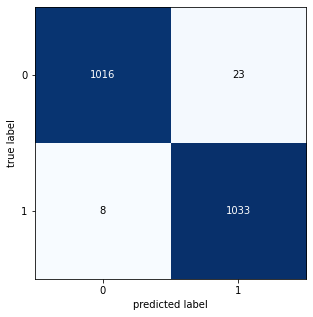

In [51]:
print(f"Accuracy : {accuracy_score(y_test,pred_xgb)}")
print(f"F1-Score : {f1_score(y_test,pred_xgb)}")

plot_confusion_matrix(cm_xgboost, figsize=(5,5))
plt.show()

### CatBoost

In [52]:
model_catboost = CatBoostClassifier(iterations=200)
model_catboost.fit(X_train,Y_train)
pred_catboost = model_catboost.predict(x_test)
cr_catboost    = classification_report(y_test,pred_catboost)
print(cr_catboost)

Learning rate set to 0.150531
0:	learn: 0.5948748	total: 258ms	remaining: 51.3s
1:	learn: 0.5130689	total: 265ms	remaining: 26.3s
2:	learn: 0.4568191	total: 273ms	remaining: 17.9s
3:	learn: 0.4194267	total: 280ms	remaining: 13.7s
4:	learn: 0.3901948	total: 287ms	remaining: 11.2s
5:	learn: 0.3731973	total: 295ms	remaining: 9.54s
6:	learn: 0.3612269	total: 303ms	remaining: 8.36s
7:	learn: 0.3517413	total: 310ms	remaining: 7.44s
8:	learn: 0.3430761	total: 318ms	remaining: 6.75s
9:	learn: 0.3309139	total: 326ms	remaining: 6.19s
10:	learn: 0.3255285	total: 334ms	remaining: 5.74s
11:	learn: 0.3182221	total: 342ms	remaining: 5.36s
12:	learn: 0.3112488	total: 349ms	remaining: 5.02s
13:	learn: 0.3069573	total: 356ms	remaining: 4.73s
14:	learn: 0.3015180	total: 363ms	remaining: 4.48s
15:	learn: 0.2968483	total: 371ms	remaining: 4.26s
16:	learn: 0.2939467	total: 378ms	remaining: 4.07s
17:	learn: 0.2882503	total: 385ms	remaining: 3.89s
18:	learn: 0.2861196	total: 392ms	remaining: 3.73s
19:	learn: 

162:	learn: 0.0785834	total: 2.48s	remaining: 563ms
163:	learn: 0.0780907	total: 2.5s	remaining: 548ms
164:	learn: 0.0777327	total: 2.51s	remaining: 533ms
165:	learn: 0.0767247	total: 2.53s	remaining: 519ms
166:	learn: 0.0754968	total: 2.55s	remaining: 504ms
167:	learn: 0.0746678	total: 2.56s	remaining: 489ms
168:	learn: 0.0739293	total: 2.58s	remaining: 473ms
169:	learn: 0.0737037	total: 2.6s	remaining: 458ms
170:	learn: 0.0732029	total: 2.61s	remaining: 443ms
171:	learn: 0.0726098	total: 2.63s	remaining: 428ms
172:	learn: 0.0722856	total: 2.64s	remaining: 412ms
173:	learn: 0.0714146	total: 2.66s	remaining: 397ms
174:	learn: 0.0710849	total: 2.67s	remaining: 382ms
175:	learn: 0.0705703	total: 2.69s	remaining: 367ms
176:	learn: 0.0700874	total: 2.71s	remaining: 352ms
177:	learn: 0.0693438	total: 2.72s	remaining: 337ms
178:	learn: 0.0689757	total: 2.74s	remaining: 321ms
179:	learn: 0.0688626	total: 2.75s	remaining: 306ms
180:	learn: 0.0683476	total: 2.77s	remaining: 291ms
181:	learn: 0.

In [53]:
cm_catboost = metrics.confusion_matrix(y_test, pred_catboost)

In [54]:
# Confusion Matrix
print(f"Accuracy : {accuracy_score(y_test,pred_catboost)}")
print(f"F1-Score : {f1_score(y_test,pred_catboost)}")

plot_confusion_matrix(cm_catboost, figsize=(5,5))
plt.show()

Accuracy : 0.9788461538461538
F1-Score : 0.979047619047619


#### Tabulating the results of various implemented models

In [55]:
score_1 = accuracy_score(y_test,y_pred_LSTM)
score_2 = accuracy_score(y_test,y_pred_BiLSTM)
score_3 = accuracy_score(y_test,pred_xgb)
score_4 = accuracy_score(y_test,pred_catboost)
results = pd.DataFrame([["LSTM",score_1],["BiLSTM",score_2],["XGBoost",score_3],
                       ["CatBoost",score_4]],columns=["Model","Accuracy"])
results

Model  Accuracy
0      LSTM  0.987019
1    BiLSTM  0.987500
2   XGBoost  0.985096
3  CatBoost  0.978846

### Predictions on Testing Data

In [56]:
# Making Predictions on test data
predictions_test = pd.DataFrame(model.predict(test_final))
predictions_test = np.round(predictions_test).astype(int)
test_id = pd.DataFrame(test["id"])
submission = pd.concat([test_id,predictions_test],axis=1)
submission.columns = ["id","label"]
submission.to_csv("submit.csv",index=False)

### Conclusion

LSTM with embedding layer works great

The model gives more than 99% accuracy on test data.

Furthermore we can also try vectoriztion or deep learning models